<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

# load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/'

t651_df = pd.read_csv(root+'t651_train.csv',index_col=0).dropna(axis=0)
idx = t651_df.index

c620_df = pd.read_csv(root+'c620_train.csv',index_col=0).loc[idx]
c620_mb = pd.read_csv(root+'c620_mbcheck.csv',index_col=0).loc[idx]

c660_df = pd.read_csv(root+'c660_train.csv',index_col=0).loc[idx]
c660_mb = pd.read_csv(root+'c660_mbcheck.csv',index_col=0).loc[idx]

c670_df = pd.read_csv(root+'c670_train.csv',index_col=0).loc[idx]
c670_mb = pd.read_csv(root+'c670_mbcheck.csv',index_col=0).loc[idx]

In [4]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/'
c620_col = joblib.load(root+'c620_col_names.pkl')
c660_col = joblib.load(root+'c660_col_names.pkl')
c670_col = joblib.load(root+'c670_col_names.pkl')
t651_col = joblib.load(root+'t651_col_names.pkl')

# check c620&t651 -> c660

In [5]:
t651_mf = t651_df[t651_col['MFR']]
c620_mf = c620_mb.iloc[:,[3]]
total = t651_mf.values + c620_mf.values
t651_mf = t651_mf/total
c620_mf = c620_mf/total
t651_x41 = t651_df[t651_col['x41']]
c620_w3 = c620_df[c620_col['sidedraw_x']]
c660_feed_pred = c620_w3.values*c620_mf.values + t651_x41.values*t651_mf.values
c660_feed_pred = pd.DataFrame(c660_feed_pred,index=idx,columns=c660_col['x41'])
c660_feed_pred.head(3)

,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
001-001,0.0,0.000175,0.011354,0.021681,0.014908,0.019511,0.030082,66.278216,0.02099,0.034398,0.0,0.014600,27.873568,0.028611,0.024798,0.020281,3.132133,0.632336,1.318028,0.365566,0.044484,1.951733e-08,0.098763,3.399222e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896395e-09,1.684247e-10,0.001555,0.000415,6.044997e-10,0.0,6.479632e-12,3.103609e-13,3.014521e-16,0.0,0.0
001-002,0.0,0.000175,0.011353,0.021678,0.014906,0.019510,0.030081,66.278232,0.02099,0.034399,0.0,0.014601,27.873554,0.028611,0.024798,0.020281,3.132134,0.632336,1.318029,0.365566,0.044484,1.951592e-08,0.098764,3.398967e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896085e-09,1.684114e-10,0.001555,0.000415,6.044514e-10,0.0,6.479096e-12,3.103352e-13,3.014266e-16,0.0,0.0
001-003,0.0,0.000175,0.011354,0.021680,0.014907,0.019510,0.030082,66.278226,0.02099,0.0

In [6]:
c660_feed = c660_df[c660_col['x41']]
c660_feed.head(3)

,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
001-001,0.0,0.000175,0.011354,0.021681,0.014908,0.019511,0.030082,66.278221,0.02099,0.034398,0.0,0.014600,27.873569,0.028611,0.024798,0.020281,3.132133,0.632336,1.318029,0.365566,0.044484,1.951733e-08,0.098763,3.399222e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896395e-09,1.684246e-10,0.001555,0.000415,6.044996e-10,0.0,6.479631e-12,3.103609e-13,3.014521e-16,0.0,0.0
001-002,0.0,0.000175,0.011353,0.021678,0.014906,0.019510,0.030081,66.278244,0.02099,0.034399,0.0,0.014601,27.873554,0.028611,0.024798,0.020281,3.132135,0.632336,1.318029,0.365566,0.044484,1.951592e-08,0.098764,3.398968e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896086e-09,1.684114e-10,0.001555,0.000415,6.044514e-10,0.0,6.479096e-12,3.103352e-13,3.014266e-16,0.0,0.0
001-003,0.0,0.000175,0.011354,0.021680,0.014907,0.019510,0.030082,66.278236,0.02099,0.0

In [7]:
np.allclose(c660_feed.values,c660_feed_pred.values)

True

# check c620,c660 -> c670

In [8]:
c660_w4 = c660_df[c660_col['bottoms_x']]
c620_w4 = c620_df[c620_col['bottoms_x']]
Tray_43_mfr = c670_mb.loc[:,['Toluene Column C670 Operation_Feed Properties \n@ Tray 43_Mass Flow Rate_ton/hr']]
Tray_54_mfr = c670_mb.loc[:,['Toluene Column C670 Operation_Feed Properties \n@ Tray 54_Mass Flow Rate_ton/hr']]
total = Tray_43_mfr.values + Tray_54_mfr.values
Tray_43_mfr = Tray_43_mfr/total
Tray_54_mfr = Tray_54_mfr/total
combined_pred = c660_w4.values*Tray_43_mfr.values + c620_w4.values*Tray_54_mfr.values
combined_pred = pd.DataFrame(combined_pred,index=idx,columns=c670_col['combined'])
combined_pred.head(3)

,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Hydrogen_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Propane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Butane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Pentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Hexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Benzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Heptane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Water_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Toluene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Octane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_p-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_m-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_o-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Nonane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Indane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2-Diethylbenzene_wt%",Tol

In [9]:
combined = c670_df[c670_col['combined']]
combined.head(3)

,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Hydrogen_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Propane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Butane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Pentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Hexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Benzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Heptane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Water_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Toluene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Octane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_p-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_m-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_o-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Nonane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Indane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2-Diethylbenzene_wt%",Tol

In [10]:
np.allclose(combined_pred.values,combined.values)

True

# bf(c670混參比例) 41*2 check

# 修改前

In [11]:
np.allclose(c670_df[c670_col['upper_bf']].values+c670_df[c670_col['lower_bf']].values,1.0)

True

修改欄位數量: 24
True
(15547, 41) (15547, 41) (15547, 41) (15547, 41)
False


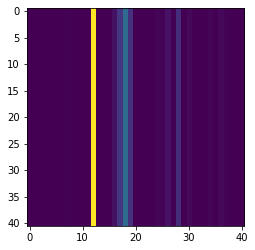

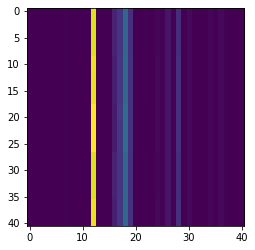

In [12]:
# 根據條件修改值
a = c670_df[c670_col['upper_bf']+c670_col['lower_bf']]
紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
print('修改欄位數量:',len(紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位))
c670_df.loc[:,紫色零點零欄位] = 0.0001 
c670_df.loc[:,紫色零點一欄位] = 0.0001 
c670_df.loc[:,紫色零點九欄位] = 0.9999
c670_df.loc[:,紫色一點零欄位] = 0.9999
c670_df[紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位].head()

# 確認質量平衡
print(np.allclose(c670_df[c670_col['upper_bf']].values+c670_df[c670_col['lower_bf']].values,1.0))

# 用bf轉換成combined
x1 = c670_df.loc[idx,c670_col['xTray43']].values
x2 = c670_df.loc[idx,c670_col['xTray54']].values
bf1 = c670_df.loc[idx,c670_col['upper_bf']].values
bf2 = c670_df.loc[idx,c670_col['lower_bf']].values
print(x1.shape,x2.shape,bf1.shape,bf2.shape)
combined_real = c670_df.loc[idx,c670_col['combined']].values
combined_pred = x1*bf1 + x2*bf2
print(np.allclose(combined_real,combined_pred))
plt.imshow(combined_real[:41])
plt.show()
plt.imshow(combined_pred[:41])

# check massblance

In [13]:
np.allclose(c620_mb.iloc[:,0].values,c620_mb.iloc[:,1:].sum(axis=1).values),\
np.allclose(c660_mb.iloc[:,0].values,c660_mb.iloc[:,1:].sum(axis=1).values),\
np.allclose(c670_mb.iloc[:,[0,1]].sum(axis=1).values,c670_mb.iloc[:,[2,3]].sum(axis=1).values)

(True, True, True)

In [14]:
def check_massblance(df,mb,c,name):
  if (name == 'c620') or (name == 'c660'):
    feed = df[c['x41']]*mb.iloc[:,0].values.reshape(-1,1)
    wt1 = df[c['vent_gas_x']]*mb.iloc[:,1].values.reshape(-1,1)
    wt2 = df[c['distillate_x']]*mb.iloc[:,2].values.reshape(-1,1)
    wt3 = df[c['sidedraw_x']]*mb.iloc[:,3].values.reshape(-1,1)
    wt4 = df[c['bottoms_x']]*mb.iloc[:,4].values.reshape(-1,1)
    a = feed.values
    b = wt1.values+wt2.values+wt3.values+wt4.values
    print(np.allclose(a,b,atol=2e-2))
    print('mean error:',np.abs(a-b).mean())
    return pd.DataFrame(a),pd.DataFrame(b)
  elif name == 'c670':
    feed1 = df[c['xTray43']]*mb.loc[:,'Toluene Column C670 Operation_Feed Properties \n@ Tray 43_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
    feed2 = df[c['xTray54']]*mb.loc[:,'Toluene Column C670 Operation_Feed Properties \n@ Tray 54_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
    wt1 = df[c['distillate_x']]*mb.iloc[:,2].values.reshape(-1,1)
    wt2 = df[c['bottoms_x']]*mb.iloc[:,3].values.reshape(-1,1)
    a = feed1.values+feed2.values
    b = wt1.values+wt2.values
    print(np.allclose(a,b,atol=2e-2))
    print('mean error:',np.abs(a-b).mean())
    return pd.DataFrame(a),pd.DataFrame(b)

True
mean error: 6.271399251612663e-05


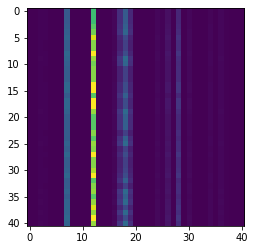

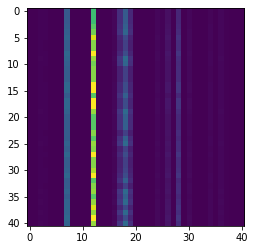

In [15]:
a,b = check_massblance(c620_df,c620_mb,c620_col,'c620')
idx = a.sample(41).index
plt.imshow(a.loc[idx].values)
plt.show()
plt.imshow(b.loc[idx].values)

In [16]:
a.loc[idx].values,b.loc[idx].values

(array([[  0.        ,   3.50964762,  84.79308169, ...,  16.00399234,
           0.        ,   0.        ],
        [  0.        ,   3.50964762,  84.79308169, ...,  16.00399234,
           0.        ,   0.        ],
        [  0.        ,   3.50964762,  84.79308169, ...,  16.00399234,
           0.        ,   0.        ],
        ...,
        [  0.        ,   4.3063161 , 104.04058242, ...,  19.63680249,
           0.        ,   0.        ],
        [  0.        ,   3.45564235,  83.79931747, ...,  26.09009805,
           0.        ,   0.        ],
        [  0.        ,   4.30631937, 104.04066134, ...,  19.63681739,
           0.        ,   0.        ]]),
 array([[  0.        ,   3.50964742,  84.79307068, ...,  16.00398979,
           0.        ,   0.        ],
        [  0.        ,   3.50964752,  84.79308441, ...,  16.0039903 ,
           0.        ,   0.        ],
        [  0.        ,   3.50964739,  84.79307689, ...,  16.00398844,
           0.        ,   0.        ],
        ...,


True
mean error: 2.9024358135451845e-05


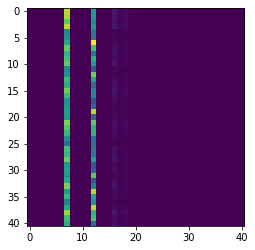

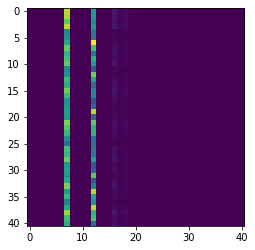

In [17]:
a,b = check_massblance(c660_df,c660_mb,c660_col,'c660')
idx = a.sample(41).index
plt.imshow(a.loc[idx].values)
plt.show()
plt.imshow(b.loc[idx].values)

In [18]:
a.loc[idx].values,b.loc[idx].values

(array([[0.00000000e+00, 8.50645611e-03, 5.51566055e-01, ...,
         2.17826976e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.95722662e-03, 5.15934086e-01, ...,
         2.04705333e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.25512650e-02, 8.14656775e-01, ...,
         9.52051008e-14, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 1.41462738e-02, 9.19339315e-01, ...,
         4.16871821e-13, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.50022840e-02, 9.75078457e-01, ...,
         4.26221730e-13, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 9.55288046e-03, 6.18131006e-01, ...,
         1.65613841e-14, 0.00000000e+00, 0.00000000e+00]]),
 array([[0.00000000e+00, 8.50645716e-03, 5.51566007e-01, ...,
         2.17827000e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.95722807e-03, 5.15934166e-01, ...,
         2.04705351e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

True
mean error: 5.118631404322684e-05


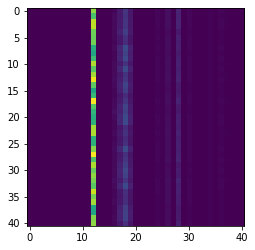

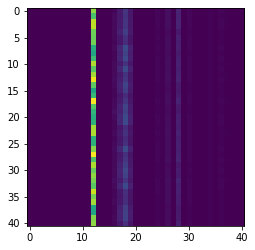

In [19]:
a,b = check_massblance(c670_df,c670_mb,c670_col,'c670')
idx = a.sample(41).index
plt.imshow(a.loc[idx].values)
plt.show()
plt.imshow(b.loc[idx].values)

In [20]:
a.loc[idx].values,b.loc[idx].values

(array([[ 0.        ,  0.        ,  0.        , ..., 26.09010234,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 24.52469433,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 26.09011891,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 17.18220003,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 17.18219874,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 22.84336845,
          0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        , ..., 26.09010763,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 24.52469656,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 26.09012698,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 1

# 用 fna,xna,s_vent,s_dist,s_side,s_bot 算 f_vent,f_dist,f_side,f_bot

In [63]:
fna = c620_df['Tatoray Stripper C620 Operation_Feed Properties_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
xna = c620_df.filter(regex='Combined Feed to Tatoray Stripper C620_Detailed Composition').iloc[:,:41].values
s_vent = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas').iloc[:,:41].values
s_dist = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Distillate').iloc[:,:41].values
s_side = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Sidedraw').iloc[:,:41].values
s_bot = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms').iloc[:,:41].values
f_vent = c620_df['Tatoray Stripper C620 Operation_Vent Gas Production Rate and Composition_Mass Flow Rate_ton/hr'].values
f_dist = c620_df['Tatoray Stripper C620 Operation_Distillate Production Rate and Composition_Mass Flow Rate_ton/hr'].values
f_side = c620_df['Tatoray Stripper C620 Operation_Sidedraw Production Rate and Composition_Mass Flow Rate_ton/hr'].values
f_bot = c620_df['Tatoray Stripper C620 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr'].values
print(np.allclose(np.sum(fna*xna*s_vent*0.01,axis=1),f_vent))
print(np.allclose(np.sum(fna*xna*s_dist*0.01,axis=1),f_dist))
print(np.allclose(np.sum(fna*xna*s_side*0.01,axis=1),f_side))
print(np.allclose(np.sum(fna*xna*s_bot*0.01,axis=1),f_bot))

True
True
True
True


# 用 wt 和 mass_flow 算 BF

In [178]:
c670_df.filter(regex='Flow Rate_ton').head()

,Combined Feed to Toluene Column C670 @ Tray 43_Flow Rate_Mass Flow Rate_ton/hr,Feed to Toluene Column C670 @ Tray 54_Flow Rate_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Feed Properties \n@ Tray 43_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Feed Properties \n@ Tray 54_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Distillate Production Rate and Composition_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr
001-001,18.150902,124.981539,18.150902,124.981539,72.607789,70.524656
001-002,18.151391,124.981555,18.151391,124.981555,72.608289,70.524656
001-003,18.151730,124.981555,18.151730,124.981555,72.608625,70.524656
001-004,18.118328,125.012984,18.118328,125.012984,72.606664,70.524656
001-005,18.118820,125.012984,18.118820,125.012984,72.607156,70.524656


In [179]:
c620_bot_x = c620_df[c620_col['bottoms_x']].values
c660_bot_x = c660_df[c660_col['bottoms_x']].values
c620_mf_bot = c620_mb.loc[:,'Tatoray Stripper C620 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
c660_mf_bot = c660_mb.loc[:,'Benzene Column C660 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr'].values.reshape(-1,1)

a = (c620_bot_x*c620_mf_bot)/(c620_bot_x*c620_mf_bot+c660_bot_x*c660_mf_bot)
a[:,[0,1,2,3,10,35]] = 0.9999
a[:,[29,39,40]] = 0.0001
b = 1-a

print(np.allclose(a,c670_df[c670_col['lower_bf']].values,atol=1e-2))
print(np.allclose(b,c670_df[c670_col['upper_bf']].values,atol=1e-2))

True
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [180]:
idx = np.random.choice([*range(len(a))],size=1)
for i,j in zip(a[idx[0]],c670_df[c670_col['lower_bf']].values[idx[0]]):
  print(i.round(4),j.round(4))

0.9999 0.9999
0.9999 0.9999
0.9999 0.9999
0.9999 0.9999
0.9996 0.9999
0.9994 0.9999
0.9983 0.9999
0.99 0.99
0.9975 0.9975
0.9787 0.9787
0.9999 0.9999
0.6023 0.6023
0.4691 0.4691
0.5615 0.5615
0.6922 0.6922
0.7332 0.7332
0.5366 0.5366
0.9511 0.9511
0.965 0.965
0.9947 0.9947
0.6483 0.6483
1.0 1.0
0.1362 0.1362
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0001 0.0001
1.0 1.0
1.0 1.0
0.2895 0.2895
0.9736 0.9736
1.0 1.0
0.9999 0.9999
1.0 1.0
1.0 1.0
1.0 1.0
0.0001 0.0001
0.0001 0.0001


In [181]:
idx = np.random.choice([*range(len(a))],size=1)
for i,j in zip(b[idx[0]],c670_df[c670_col['upper_bf']].values[idx[0]]):
  print(i.round(4),j.round(4))

0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0002 0.0001
0.0006 0.0001
0.005 0.005
0.001 0.001
0.012 0.012
0.0001 0.0001
0.33 0.33
0.3081 0.3081
0.2769 0.2769
0.1897 0.1897
0.1612 0.1612
0.3541 0.3541
0.0353 0.0353
0.0259 0.0259
0.0036 0.0036
0.2239 0.2239
0.0 0.0
0.7716 0.7716
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.9999 0.9999
0.0 0.0
0.0 0.0
0.5481 0.5481
0.0138 0.0138
0.0 0.0
0.0001 0.0001
0.0 0.0
0.0 0.0
0.0 0.0
0.9999 0.9999
0.9999 0.9999
